In [3]:
import pandas as pd

df = pd.read_csv('data.csv')

target_col = 'Diabetes_012'

x = df.drop(columns=[target_col])
y = df[target_col]

print("Formato:", df.shape)
print("Alvo: ", target_col)

df.head()

Formato: (253680, 22)
Alvo:  Diabetes_012


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
print("Distribuicao do alvo")
print(y.value_counts(normalize=True).round(3))
df.head()

Distribuicao do alvo
Diabetes_012
0.0    0.842
2.0    0.139
1.0    0.018
Name: proportion, dtype: float64


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Treino e validacao

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# treina modelo 
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# predicao dataset
y_pred = model.predict(x_test)

# avalia
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8429359823399558
Confusion Matrix:
 [[51736    55  1635]
 [ 1028     0   130]
 [ 7105     8  1723]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     53426
         1.0       0.00      0.00      0.00      1158
         2.0       0.49      0.19      0.28      8836

    accuracy                           0.84     63420
   macro avg       0.45      0.39      0.40     63420
weighted avg       0.80      0.84      0.81     63420



### Arvores de decisão

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=5,
    min_samples_leaf=200
)
tree.fit(x_train, y_train)
print("Arvore treinada")



Arvore treinada


In [14]:
# avaliacao

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_pred = tree.predict(x_train)
y_pred = tree.predict(x_test)

print("Acurácia treino:", accuracy_score(y_train, x_pred))
print("Acurácia teste :", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão teste:\n", confusion_matrix(y_test, y_pred))
print("\nMatriz de confusão treino:\n", confusion_matrix(y_train, x_pred))
print("\nRelatório teste:\n", classification_report(y_test, y_pred))


Acurácia treino: 0.8480395248607169
Acurácia teste : 0.8469567959634184

Matriz de confusão teste:
 [[52582     0   844]
 [ 1068     0    90]
 [ 7704     0  1132]]

Matriz de confusão treino:
 [[157757      0   2520]
 [  3222      0    251]
 [ 22919      0   3591]]

Relatório teste:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     53426
         1.0       0.00      0.00      0.00      1158
         2.0       0.55      0.13      0.21      8836

    accuracy                           0.85     63420
   macro avg       0.47      0.37      0.37     63420
weighted avg       0.80      0.85      0.80     63420



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


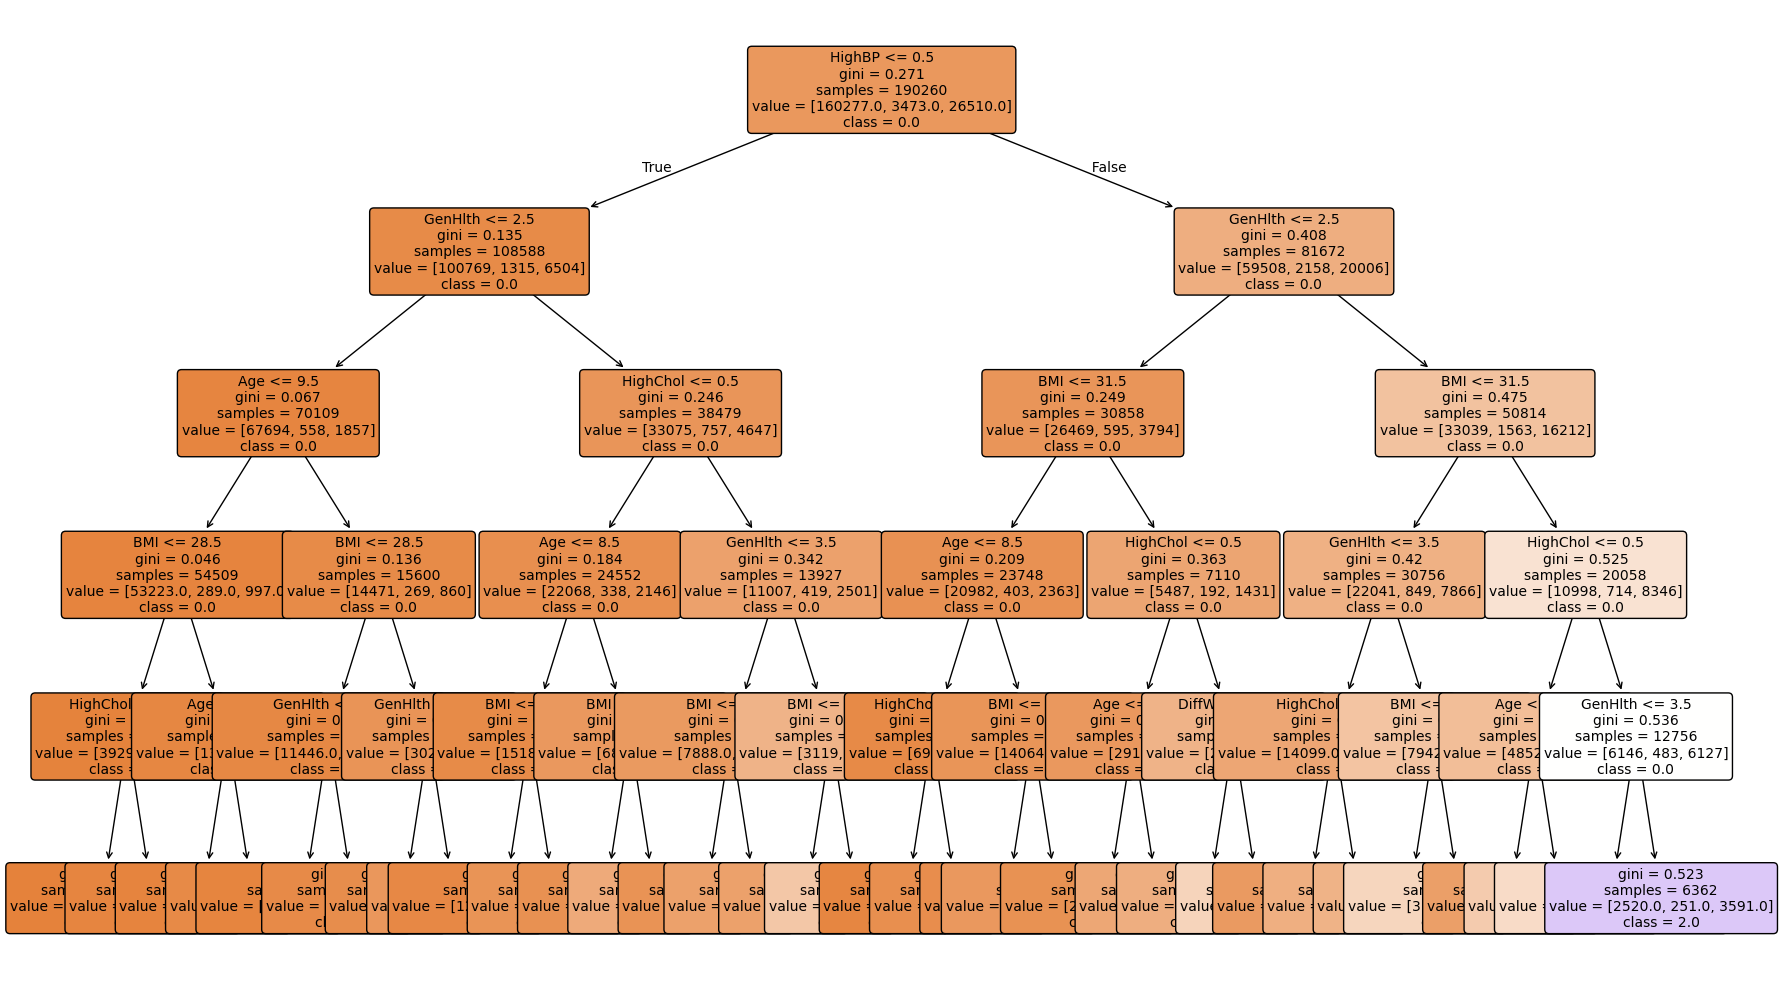

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    tree,
    feature_names=x.columns,
    class_names=[str(c) for c in tree.classes_],
    filled=True,
    rounded=True,
    fontsize=10 
)

plt.tight_layout()
plt.show()

### extraindo as regras

In [26]:

import numpy as np

def extract_rules_from_tree(dt: DecisionTreeClassifier, feature_names, class_names=None, precision=2):
    tree_ = dt.tree_
    feat_name = [feature_names[i] if i != -2 else "undefined" for i in tree_.feature]
    if class_names is None:
        class_names = dt.classes_
    rules = []
    path = []

    def go(node_id):
        if tree_.feature[node_id] != -2:
            name = feat_name[node_id]
            thr = round(float(tree_.threshold[node_id]), precision)

            # galho esquerdo: <= thr
            path.append(f"{name} <= {thr}")
            go(tree_.children_left[node_id])
            path.pop()

            # galho direito: > thr
            path.append(f"{name} > {thr}")
            go(tree_.children_right[node_id])
            path.pop()
        else:
            values = tree_.value[node_id][0]
            cls_id = int(np.argmax(values))
            cls = class_names[cls_id]
            cond = " E ".join(path) if path else "VERDADE"
            rules.append(f"SE {cond} ENTÃO Diabetes = {cls}")

    go(0)
    return rules

rules = extract_rules_from_tree(tree, x.columns)
print("Total de regras:", len(rules))
print("\n".join(rules[:30]))  # mostre as 10 primeiras


Total de regras: 32
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age <= 9.5 E BMI <= 28.5 E HighChol <= 0.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age <= 9.5 E BMI <= 28.5 E HighChol > 0.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age <= 9.5 E BMI > 28.5 E Age <= 6.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age <= 9.5 E BMI > 28.5 E Age > 6.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age > 9.5 E BMI <= 28.5 E GenHlth <= 1.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age > 9.5 E BMI <= 28.5 E GenHlth > 1.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age > 9.5 E BMI > 28.5 E GenHlth <= 1.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth <= 2.5 E Age > 9.5 E BMI > 28.5 E GenHlth > 1.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth > 2.5 E HighChol <= 0.5 E Age <= 8.5 E BMI <= 33.5 ENTÃO Diabetes = 0.0
SE HighBP <= 0.5 E GenHlth > 2.5 E HighChol <= 0.5 E Age <= 8.5 E BMI > 33.5 ENTÃO Diabetes = 0.0
SE HighBP

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64 

Proporção:
Diabetes_012
0.0    0.842
2.0    0.139
1.0    0.018
Name: proportion, dtype: float64


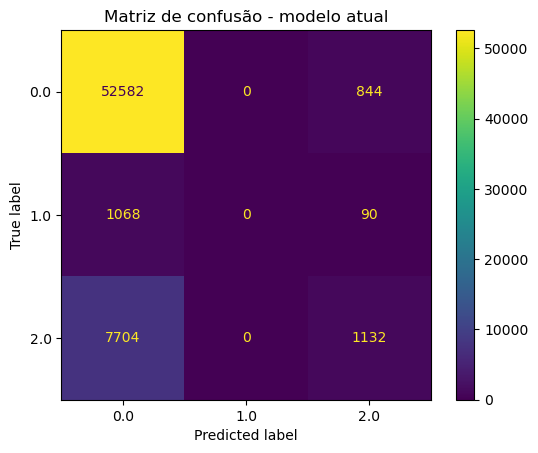

In [28]:
# Distribuição do alvo
print(y.value_counts(), "\n")
print("Proporção:")
print(y.value_counts(normalize=True).round(3))

# Matriz de confusão do modelo atual
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pred_te = tree.predict(x_test)
cm = confusion_matrix(y_test, pred_te, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(values_format="d")
plt.title("Matriz de confusão - modelo atual")
plt.show()


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

tree_bal = DecisionTreeClassifier(
    criterion="gini",
    class_weight="balanced",  # ⭐️ chave para não prever tudo 0
    max_depth=6,              # um pouco mais profunda
    min_samples_leaf=100,     # menos restritiva que 200 (ajuste se necessário)
    random_state=42
)
tree_bal.fit(x_train, y_train)

pred_tr = tree_bal.predict(x_train)
pred_te = tree_bal.predict(x_test)

print("Acurácia (train):", accuracy_score(y_train, pred_tr))
print("Acurácia (test): ", accuracy_score(y_test, pred_te))
print("\nRelatório (test):\n", classification_report(y_test, pred_te))


Acurácia (train): 0.565788920424682
Acurácia (test):  0.564884894355093

Relatório (test):
               precision    recall  f1-score   support

         0.0       0.96      0.56      0.71     53426
         1.0       0.02      0.29      0.04      1158
         2.0       0.32      0.63      0.42      8836

    accuracy                           0.56     63420
   macro avg       0.43      0.49      0.39     63420
weighted avg       0.85      0.56      0.65     63420



In [40]:
tree_entropy = DecisionTreeClassifier(
    criterion="entropy",
    class_weight="balanced",
    max_depth=6,
    min_samples_leaf=100,
    random_state=42
).fit(x_train, y_train)

print("Test acc (entropy):", accuracy_score(y_test, tree_entropy.predict(x_test)))
print(classification_report(y_test, tree_entropy.predict(x_test)))


Test acc (entropy): 0.6019552191737623
              precision    recall  f1-score   support

         0.0       0.95      0.60      0.73     53426
         1.0       0.02      0.22      0.04      1158
         2.0       0.31      0.67      0.43      8836

    accuracy                           0.60     63420
   macro avg       0.43      0.50      0.40     63420
weighted avg       0.85      0.60      0.68     63420

